# 实践应用：

假设我们正在训练一个线性回归模型来预测鸢尾花的类别。鸢尾花数据集是一个经典的分类问题，其中包含了三个不同种类的鸢尾花，分别是山鸢尾（Iris-setosa）、变色鸢尾（Iris-versicolor）和维吉尼亚鸢尾（Iris-virginica）。每个样本包含了鸢尾花的四个特征：花萼长度、花萼宽度、花瓣长度和花瓣宽度。我们使用逻辑回归模型来根据这些特征预测鸢尾花的类别。 为了应用正则化，我们可以在损失函数中加入一个正则化项。最常用的正则化方法之一是L2正则化，也称为权重衰减。它通过惩罚模型的权重参数的大小来降低模型的复杂度。 下面是一个简单的使用逻辑回归并应用L2正则化的例子，我们将使用Scikit-learn库：

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 加载鸢尾花数据集
iris = load_iris()
X, y = iris.data, iris.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 创建逻辑回归模型，并设置正则化参数C（C的倒数表示正则化强度，即较小的C值表示较强的正则化）
log_reg = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')

# 在训练集上拟合模型
log_reg.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = log_reg.predict(X_test)

# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print("模型准确率：", accuracy)


模型准确率： 0.9666666666666667


在这个例子中，我们使用了逻辑回归模型，并使用了L2正则化。在模型训练过程中，我们通过设置C参数来调整正则化的强度。较小的C值表示更强的正则化。逻辑回归模型的penalty参数被设置为'l2'，以表示我们使用L2正则化。

通过调节C值，我们可以控制模型的复杂度，以提高模型在测试集上的泛化能力。

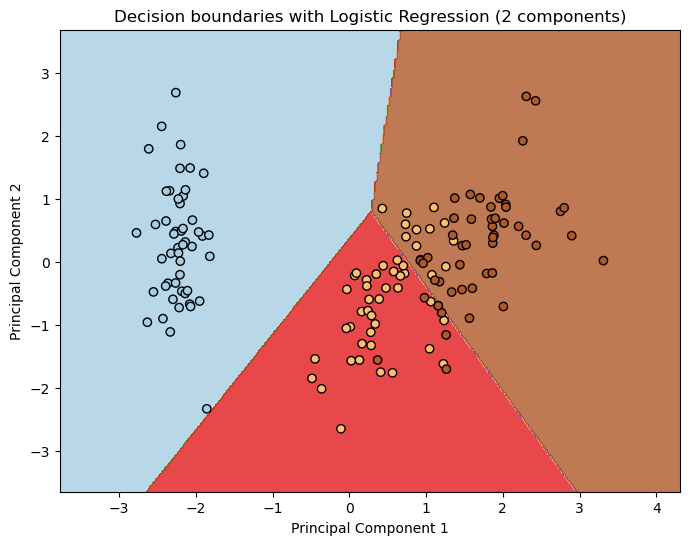

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 对数据进行主成分分析降维
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# 训练逻辑回归模型
log_reg.fit(X_reduced, y)

# 绘制决策边界
h = .02  # 步长
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# 将结果绘制成彩色图
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# 绘制数据点
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision boundaries with Logistic Regression (2 components)')
plt.show()


使用了主成分分析将数据降至二维，然后绘制了逻辑回归模型在降维后数据上的决策边界。